# Task 1: Data Quality Assessment

In [1]:
#Import all libraries
import pandas as pd
import numpy as np

In [95]:
# Read all sheets in File
df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name=None)

# Prints all the sheets name in an ordered dictionary
print(df.keys())

<ipython-input-95-62085502e47d>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name=None)
<ipython-input-95-62085502e47d>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name=None)


dict_keys(['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress'])


In [96]:
transactions_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='Transactions')
newcustomer_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='NewCustomerList')
customerdemographic_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='CustomerDemographic')
customeraddress_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='CustomerAddress')

<ipython-input-96-5a1e6d5427d8>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  newcustomer_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='NewCustomerList')
<ipython-input-96-5a1e6d5427d8>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customerdemographic_df = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final (1).xlsx', sheet_name='CustomerDemographic')


In [5]:
transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

We notice that the 'product_first_sold_date' should be converted into a date format.

In [97]:
transactions_df['product_first_sold_date'] = pd.to_datetime(transactions_df['product_first_sold_date'])

In [8]:
transactions_df['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [9]:
transactions_df['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [10]:
transactions_df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [11]:
transactions_df['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [12]:
transactions_df['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [13]:
transactions_df.duplicated().sum()

0

There are no duplicates.

Now let's focus on the newcustomerlist sheet.

In [15]:
newcustomer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.91,1.1375,1.421875,1.208594,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.86,0.8600,1.075000,0.913750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.55,0.5500,0.550000,0.550000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.61,0.7625,0.762500,0.762500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.93,0.9300,1.162500,1.162500,4,4,1.703125


In [16]:
newcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [98]:
newcustomer_df = newcustomer_df.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'])

In [18]:
newcustomer_df['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [99]:
newcustomer_df['gender'] = newcustomer_df['gender'].replace({'U': 'Unspecified'})

In [20]:
newcustomer_df['job_title'].value_counts()

Associate Professor         15
Environmental Tech          14
Software Consultant         14
Chief Design Engineer       13
Assistant Manager           12
                            ..
Accountant II                1
Programmer IV                1
Administrative Officer       1
Accounting Assistant III     1
Web Developer I              1
Name: job_title, Length: 184, dtype: int64

In [21]:
newcustomer_df['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [22]:
newcustomer_df['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [23]:
newcustomer_df['deceased_indicator'].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

In [100]:
newcustomer_df['deceased_indicator'] = newcustomer_df['deceased_indicator'].replace({'N': 'No'})

In [30]:
newcustomer_df['deceased_indicator'].value_counts()

No    1000
Name: deceased_indicator, dtype: int64

In [28]:
newcustomer_df['owns_car'].value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

In [25]:
newcustomer_df['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [26]:
newcustomer_df['country'].value_counts()

Australia    1000
Name: country, dtype: int64

Now let's focus on the customer demographic sheet.

In [32]:
customerdemographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [33]:
customerdemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [101]:
customerdemographic_df = customerdemographic_df.drop(columns=['default'])

In [35]:
customerdemographic_df['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [102]:
customerdemographic_df['gender'] = customerdemographic_df['gender'].replace({'U': 'Unspecfied', 'F': 'Female', 'Femal': 'Female', 'M': 'Male'})

In [37]:
customerdemographic_df['gender'].value_counts()

Female        2039
Male          1873
Unspecfied      88
Name: gender, dtype: int64

In [38]:
customerdemographic_df['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [39]:
customerdemographic_df['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [40]:
customerdemographic_df['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [103]:
customerdemographic_df['deceased_indicator'].replace({'N': 'No', 'Y': 'Yes'}, inplace=True)

In [45]:
customerdemographic_df['deceased_indicator'].value_counts()

No     3998
Yes       2
Name: deceased_indicator, dtype: int64

In [41]:
customerdemographic_df['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

Let's focus on the customer address sheet.

In [46]:
customeraddress_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [47]:
customeraddress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [48]:
customeraddress_df['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [104]:
customeraddress_df['state'] = customeraddress_df['state'].replace({'New South Wales': 'NSW', 'Victoria': 'VIC'})

In [50]:
customeraddress_df['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [51]:
customeraddress_df['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [105]:
#DATA INTEGRATION
Customerlist = pd.merge(customerdemographic_df, customeraddress_df, on='customer_id')

In [53]:
Customerlist.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,No,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,No,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,No,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


In [106]:
day = "2017-12-31"
day = pd.to_datetime(day)
Recency = transactions_df.groupby('customer_id').agg({"transaction_date":lambda x:((day-x.max()).days)})
Recency = Recency.loc[:, ['transaction_date']]
Recency =  Recency.rename(columns={'transaction_date': 'recency'})
Recency.head(10)

,recency
customer_id,
1,8
2,129
3,103
4,196
5,17
6,65
7,254
8,23
9,79


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['recency'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['recency'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['recency'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['recency'], **{})
chart

In [107]:
Customerlist = Customerlist.merge(Recency, on= 'customer_id', how='left')

In [56]:
Customerlist.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,recency
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,8.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,129.0
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,No,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,196.0
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,No,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,17.0
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,No,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,65.0


In [108]:
Customerlist['recency'].fillna(Customerlist['recency'].mean(), inplace=True)

In [109]:
Frequency = transactions_df.groupby('customer_id')['transaction_id'].count().reset_index()
Frequency = Frequency.rename(columns={'transaction_id': 'frequency'})

In [59]:
Frequency.head(5)

,customer_id,frequency
0,1,11
1,2,3
2,3,8
3,4,2
4,5,6


In [110]:
Customerlist = Customerlist.merge(Frequency, on= 'customer_id', how='left')

In [61]:
Customerlist.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,recency,frequency
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,8.0,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,129.0,3.0
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,No,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,196.0,2.0
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,No,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,17.0,6.0
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,No,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,65.0,5.0


In [111]:
#Monetary
Monetary = transactions_df.loc[transactions_df['order_status'] == 'Approved'].groupby('customer_id').agg({'list_price': 'sum', 'standard_cost': 'sum'})

In [112]:
Monetary['Monetary'] = Monetary['list_price'] - Monetary['standard_cost']
Monetary = Monetary.drop(['list_price', 'standard_cost'], axis=1)
Monetary

,Monetary
customer_id,
1,3018.090000
2,2226.260000
3,3362.810000
4,220.570000
5,2394.940000
...,...
3497,1648.320000
3498,3147.330000
3499,4955.250000


In [113]:
Customerlist = Customerlist.merge(Monetary, on='customer_id', how='left')

In [114]:
Customerlist['Monetary'].fillna(0, inplace=True)

In [ ]:
Customerlist.dtypes

In [115]:
target_year=2017
Customerlist['age'] = target_year - Customerlist['DOB'].dt.year
median_age = Customerlist['age'].median()
Customerlist['age'].fillna(median_age, inplace=True)
Customerlist['age'].value_counts()

40.0     291
39.0     217
43.0     152
41.0     152
37.0     123
44.0     122
38.0     118
42.0     114
31.0     114
58.0      94
32.0      91
22.0      89
46.0      88
53.0      85
19.0      80
23.0      79
36.0      79
48.0      78
55.0      75
25.0      74
20.0      74
28.0      74
50.0      73
30.0      72
29.0      71
60.0      71
52.0      69
49.0      69
21.0      67
51.0      65
61.0      63
56.0      60
63.0      60
18.0      60
24.0      60
54.0      59
62.0      58
57.0      58
47.0      57
59.0      55
45.0      54
27.0      53
26.0      48
33.0      43
17.0      42
35.0      41
34.0      40
16.0      34
64.0      19
15.0       6
174.0      1
73.0       1
86.0       1
82.0       1
74.0       1
77.0       1
Name: age, dtype: int64

In [116]:
Customerlist = Customerlist.loc[Customerlist['age'] < 174]
Customerlist['age'].value_counts()

40.0    291
39.0    217
43.0    152
41.0    152
37.0    123
44.0    122
38.0    118
31.0    114
42.0    114
58.0     94
32.0     91
22.0     89
46.0     88
53.0     85
19.0     80
23.0     79
36.0     79
48.0     78
55.0     75
25.0     74
28.0     74
20.0     74
50.0     73
30.0     72
29.0     71
60.0     71
49.0     69
52.0     69
21.0     67
51.0     65
61.0     63
24.0     60
56.0     60
18.0     60
63.0     60
54.0     59
62.0     58
57.0     58
47.0     57
59.0     55
45.0     54
27.0     53
26.0     48
33.0     43
17.0     42
35.0     41
34.0     40
16.0     34
64.0     19
15.0      6
73.0      1
86.0      1
82.0      1
74.0      1
77.0      1
Name: age, dtype: int64

In [117]:
newcustomer_df['age'] = target_year - newcustomer_df['DOB'].dt.year

In [118]:
median_age2 = newcustomer_df['age'].median()

In [119]:
newcustomer_df['age'].fillna(median_age2, inplace=True)
newcustomer_df['age'].value_counts()

45.0    38
43.0    29
41.0    27
39.0    27
44.0    27
        ..
71.0     7
28.0     6
33.0     5
68.0     4
15.0     3
Name: age, Length: 65, dtype: int64

In [72]:
Customerlist['frequency'].isnull().sum()

507

In [120]:
Customerlist['frequency'] = Customerlist['frequency'].fillna(0)

In [121]:
Customerlist['frequency'] = Customerlist['frequency'].astype(int)

In [75]:
Customerlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3995 entries, 0 to 3995
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3995 non-null   int64         
 1   first_name                           3995 non-null   object        
 2   last_name                            3870 non-null   object        
 3   gender                               3995 non-null   object        
 4   past_3_years_bike_related_purchases  3995 non-null   int64         
 5   DOB                                  3908 non-null   datetime64[ns]
 6   job_title                            3491 non-null   object        
 7   job_industry_category                3340 non-null   object        
 8   wealth_segment                       3995 non-null   object        
 9   deceased_indicator                   3995 non-null   object        
 10  owns_car    

In [76]:
Customerlist['tenure'].isnull().sum()

87

In [122]:
Customerlist['tenure'] = Customerlist['tenure'].fillna(Customerlist['tenure'].mean())

In [78]:
Customerlist['tenure'].value_counts

<bound method IndexOpsMixin.value_counts of 0       11.000000
1       16.000000
2        7.000000
3        8.000000
4       13.000000
          ...    
3991    19.000000
3992     1.000000
3993    10.653531
3994    10.000000
3995    11.000000
Name: tenure, Length: 3995, dtype: float64>

In [80]:
Customerlist.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,address,postcode,state,country,property_valuation,recency,frequency,Monetary,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,...,11,060 Morning Avenue,2016,NSW,Australia,10,8.0,11,3018.09,64.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,...,16,6 Meadow Vale Court,2153,NSW,Australia,10,129.0,3,2226.26,37.0
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,No,...,7,0 Holy Cross Court,4211,QLD,Australia,9,196.0,2,220.57,56.0
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,No,...,8,17979 Del Mar Point,2448,NSW,Australia,4,17.0,6,2394.94,40.0
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,No,...,13,9 Oakridge Court,3216,VIC,Australia,9,65.0,5,3946.55,51.0


In [81]:
Customerlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3995 entries, 0 to 3995
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3995 non-null   int64         
 1   first_name                           3995 non-null   object        
 2   last_name                            3870 non-null   object        
 3   gender                               3995 non-null   object        
 4   past_3_years_bike_related_purchases  3995 non-null   int64         
 5   DOB                                  3908 non-null   datetime64[ns]
 6   job_title                            3491 non-null   object        
 7   job_industry_category                3340 non-null   object        
 8   wealth_segment                       3995 non-null   object        
 9   deceased_indicator                   3995 non-null   object        
 10  owns_car    

In [123]:
Customerlist['tenure'] = Customerlist['tenure'].astype(int)

In [82]:
Customerlist = pd.get_dummies(Customerlist, columns=['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'state'])

In [136]:
gender_map = {'Male': 0, 'Female': 1, 'Unspecified': 2}
Customerlist['gender'] = Customerlist['gender'].replace(gender_map)
newcustomer_df['gender'] = newcustomer_df['gender'].replace(gender_map)

In [137]:
deceased_map = {'N': 0, 'Y': 1}
Customerlist['deceased_indicator'] = Customerlist['deceased_indicator'].replace(deceased_map)
newcustomer_df['deceased_indicator'] = newcustomer_df['deceased_indicator'].replace(deceased_map)

In [138]:
car_map = {'No': 0, 'Yes': 1}
Customerlist['owns_car'] = Customerlist['owns_car'].replace(car_map)
newcustomer_df['owns_car'] = newcustomer_df['owns_car'].replace(car_map)

In [139]:
Customerlist = Customerlist.reindex(columns=['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'recency', 'frequency', 'Monetary', 'age'])

In [140]:
newcustomer_df_df = newcustomer_df.reindex(columns=['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age'])

In [141]:
Customerlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3995 entries, 0 to 3995
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3995 non-null   int64         
 1   first_name                           3995 non-null   object        
 2   last_name                            3870 non-null   object        
 3   gender                               3995 non-null   object        
 4   past_3_years_bike_related_purchases  3995 non-null   int64         
 5   DOB                                  3908 non-null   datetime64[ns]
 6   job_title                            3491 non-null   object        
 7   job_industry_category                3340 non-null   object        
 8   wealth_segment                       3995 non-null   object        
 9   deceased_indicator                   3995 non-null   object        
 10  owns_car    

<ipython-input-142-36bd7056fabe>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Customerlist['age'], ax=axs[0]);
<ipython-input-142-36bd7056fabe>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newcustomer_df['age'], ax=axs[1]);


Text(0, 0.5, 'Density')

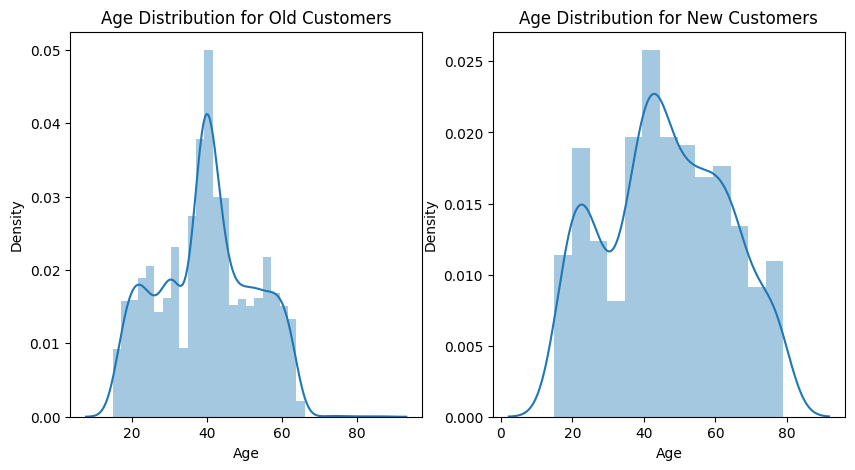

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

#Plot the first subplot
sns.distplot(Customerlist['age'], ax=axs[0]);
axs[0].set_title('Age Distribution for Old Customers')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Density')


#Plot the second subplot
sns.distplot(newcustomer_df['age'], ax=axs[1]);
axs[1].set_title('Age Distribution for New Customers')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Density')

In [143]:
with pd.option_context('display.width', None):
    display(pd.concat([newcustomer_df['age'].describe(), Customerlist['age'].describe()], axis=1))

,age,age
count,1000.000000,3995.000000
mean,46.186000,39.934168
std,16.929087,12.473424
min,15.000000,15.000000
25%,34.750000,31.000000
50%,45.000000,40.000000
75%,60.000000,49.000000
max,79.000000,86.000000


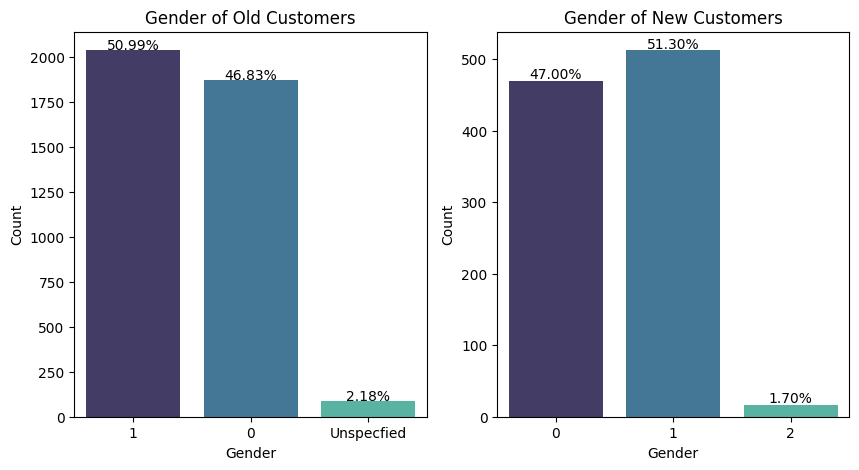

In [144]:
total_old = float(len(Customerlist['gender']))
total_new = float(len(newcustomer_df['gender']))

custom_palette = sns.color_palette('mako', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.countplot(x="gender", data=Customerlist, palette=custom_palette, ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_old) * 100),
            ha="center")
axs[0].set_title('Gender of Old Customers')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')


# Plot the first subplot
sns.countplot(x="gender", data=newcustomer_df, palette=custom_palette, ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_new) * 100),
            ha="center")
axs[1].set_title('Gender of New Customers')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')

plt.show()

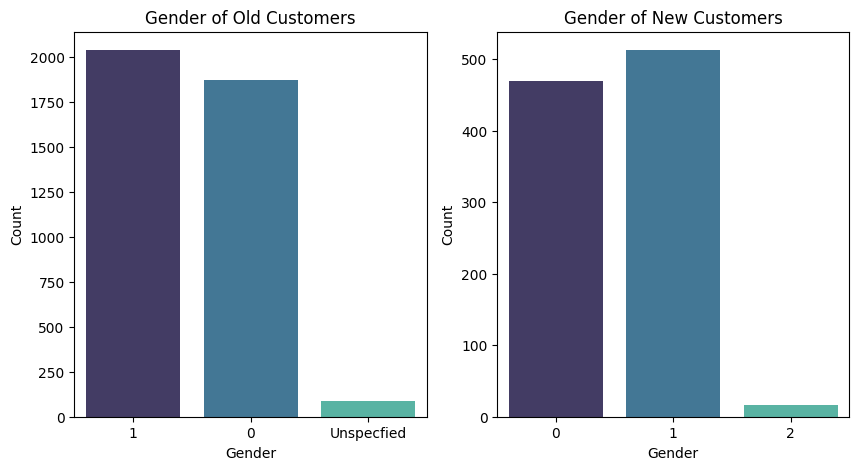

In [146]:
custom_palette = sns.color_palette('mako', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.countplot(x="gender", data=Customerlist, palette=custom_palette, ax=axs[0])
axs[0].set_title('Gender of Old Customers')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')


# Plot the first subplot
sns.countplot(x="gender", data=newcustomer_df, palette=custom_palette, ax=axs[1])
axs[1].set_title('Gender of New Customers')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')

plt.show()

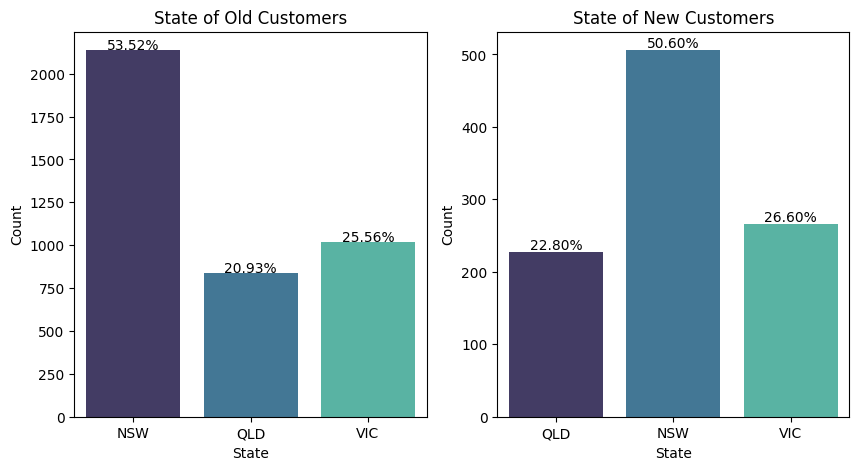

In [147]:
custom_palette = sns.color_palette('mako', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.countplot(x="state", data=Customerlist, palette=custom_palette, ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_old) * 100),
            ha="center")
axs[0].set_title('State of Old Customers')
axs[0].set_xlabel('State')
axs[0].set_ylabel('Count')


# Plot the first subplot
sns.countplot(x="state", data=newcustomer_df, palette=custom_palette, ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_new) * 100),
            ha="center")
axs[1].set_title('State of New Customers')
axs[1].set_xlabel('State')
axs[1].set_ylabel('Count')

plt.show()

In [148]:
rfm_means = pd.DataFrame({'gender': [0,1,2],
                           'recency': Customerlist.groupby(['gender'])['recency'].mean().tolist(),
                           'frequency': Customerlist.groupby(['gender'])['frequency'].mean().tolist(),
                           'frequencies': Customerlist.groupby(['gender'])['frequency'].sum().tolist(),
                           'monetary': Customerlist.groupby(['gender'])['Monetary'].mean().tolist(),
                           'monetaries': Customerlist.groupby(['gender'])['Monetary'].sum().tolist(),
                          })
rfm_means

,gender,recency,frequency,frequencies,monetary,monetaries
0,0,62.046074,5.086050,9516,2823.328103,5282446.88
1,1,62.070330,4.907707,9997,2683.082086,5465438.21
2,2,50.044613,5.126437,446,3134.540920,272705.06


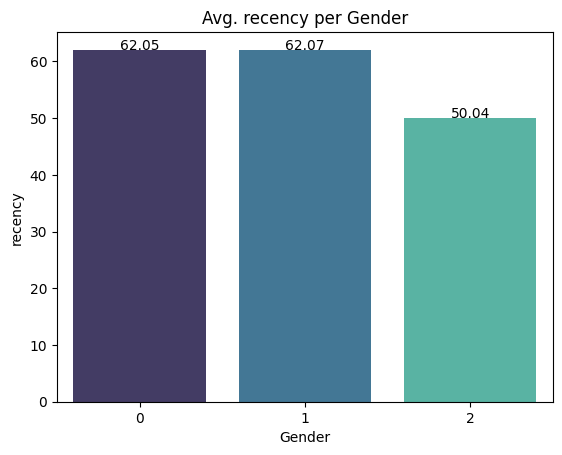

In [149]:
custom_palette = sns.color_palette('mako', n_colors=3)
ax = sns.barplot(data=rfm_means, x='gender', y='recency', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}'.format(height),
            ha="center")

ax.set_xlabel('Gender')
ax.set_ylabel('recency')
ax.set_title("Avg. recency per Gender")
plt.show()

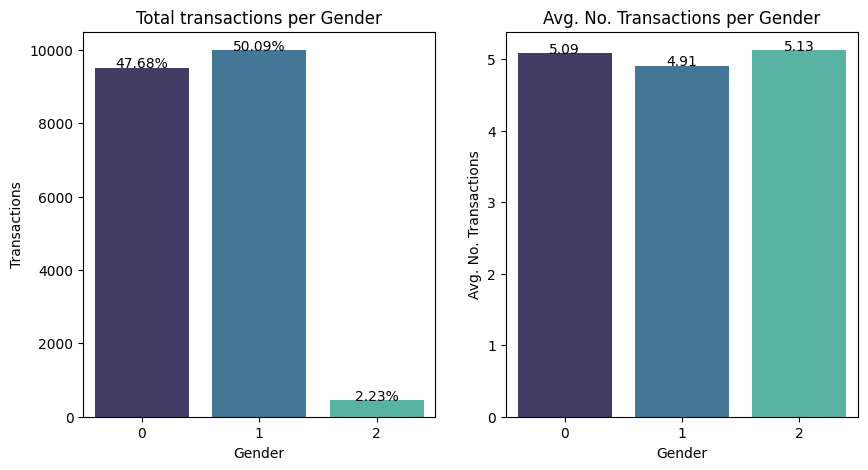

In [150]:
custom_palette = sns.color_palette('mako', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.barplot(data=rfm_means, x='gender', y='frequencies', palette=custom_palette, ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3.2,
            '{:.2f}%'.format(height * 100 / rfm_means['frequencies'].sum()),
            ha="center")
axs[0].set_title("Total transactions per Gender")
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Transactions')


# Plot the second subplot
sns.barplot(data=rfm_means, x='gender', y='frequency', palette=custom_palette, ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}'.format((height)),
            ha="center")
axs[1].set_title('Avg. No. Transactions per Gender')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Avg. No. Transactions')

plt.show()

In [151]:
frequency = Customerlist.groupby(['state'])['frequency'].sum().tolist()
monetory = Customerlist.groupby(['state'])['Monetary'].sum().tolist()
recency = Customerlist.groupby(['state'])['recency'].mean().tolist()

state_nt = pd.DataFrame({'state': sorted(Customerlist['state'].value_counts().index.tolist()),
                         'frequency': frequency,
                         'monetary': monetory,
                         'recency': monetory,
                        })

state_nt

,state,frequency,monetary,recency
0,NSW,10685,5865841.47,5865841.47
1,QLD,4253,2363051.58,2363051.58
2,VIC,5021,2791697.10,2791697.10


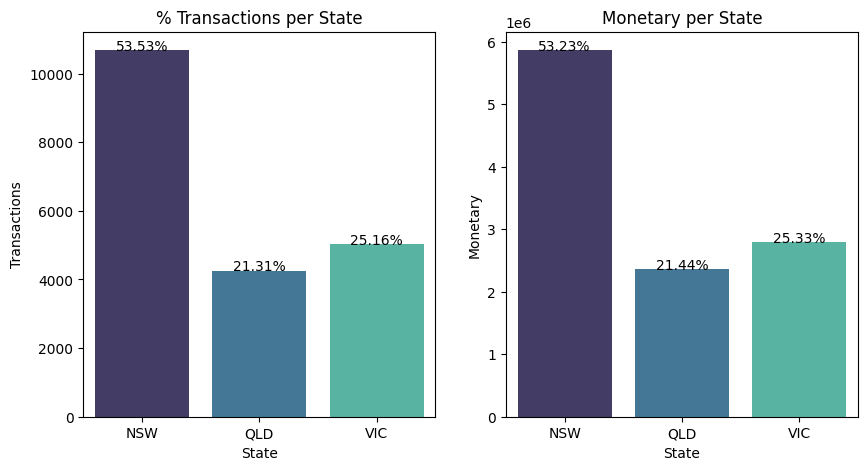

In [152]:
custom_palette = sns.color_palette('mako', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.barplot(data=state_nt, x='state', y='frequency', palette=custom_palette, ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3.2,
            '{:.2f}%'.format((height / state_nt['frequency'].sum()) * 100),
            ha="center")
axs[0].set_title("% Transactions per State")
axs[0].set_xlabel('State')
axs[0].set_ylabel('Transactions')


# Plot the second subplot
sns.barplot(data=state_nt, x='state', y='monetary', palette=custom_palette, ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.2f}%'.format((height / state_nt['monetary'].sum()) * 100),
            ha="center")
axs[1].set_title('Monetary per State')
axs[1].set_xlabel('State')
axs[1].set_ylabel('Monetary')

plt.show()

In [153]:
Customerlist['wealth_segment'].value_counts()

Mass Customer        1997
High Net Worth       1020
Affluent Customer     978
Name: wealth_segment, dtype: int64

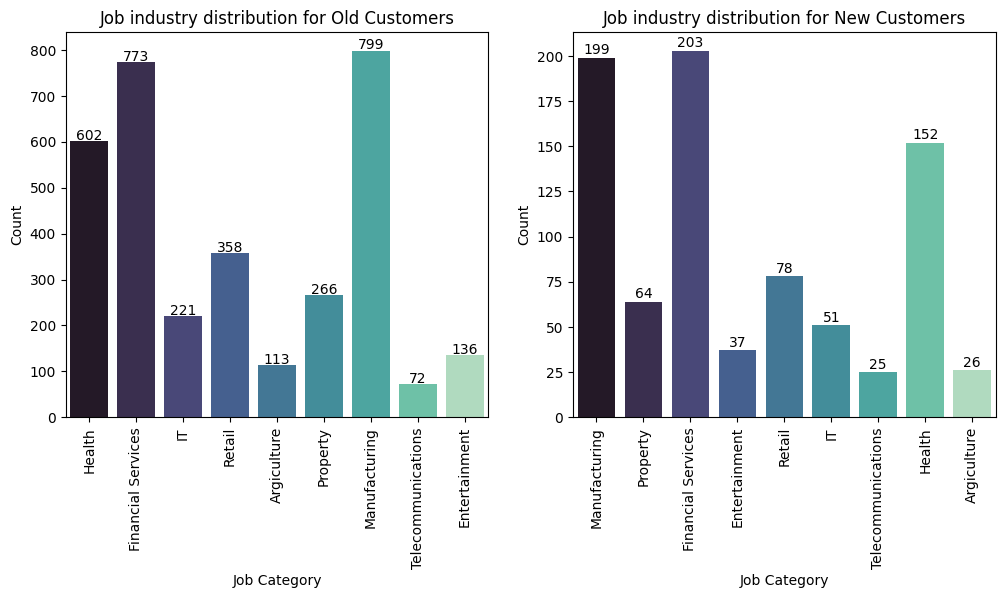

In [155]:
custom_palette = sns.color_palette('mako', n_colors=9)
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

# Plot the first subplot
sns.countplot(x="job_industry_category", data=Customerlist, palette=custom_palette, orient='v', ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.0f}'.format(height),
            ha="center")

axs[0].set_title("Job industry distribution for Old Customers")
axs[0].set_xlabel('Job Category')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_ylabel('Count')


# Plot the second subplot
sns.countplot(x="job_industry_category", data=newcustomer_df, palette=custom_palette, orient='v', ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 2,
            '{:.0f}'.format(height),
            ha="center")

axs[1].set_title("Job industry distribution for New Customers")
axs[1].set_xlabel('Job Category')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_ylabel('Count')

plt.show()

<ipython-input-156-584d3eace311>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Customerlist['past_3_years_bike_related_purchases'], ax=axs[0]);
<ipython-input-156-584d3eace311>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newcustomer_df['past_3_years_bike_related_purchases'], ax=axs[1]);


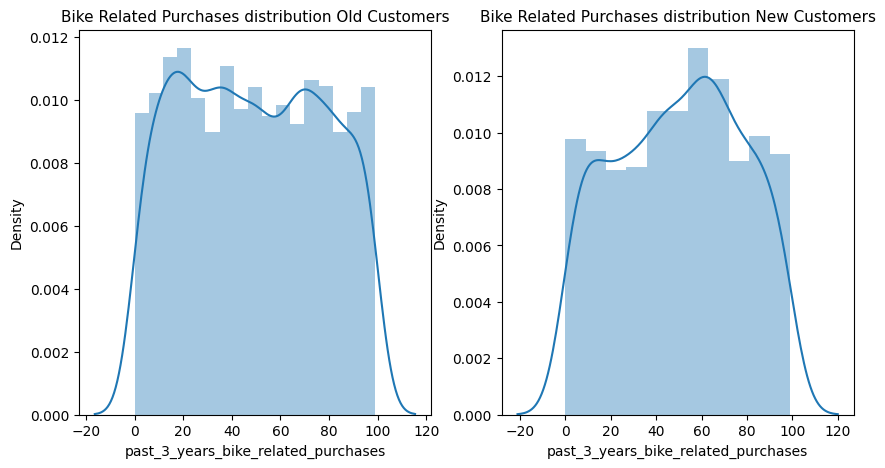

In [156]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.distplot(Customerlist['past_3_years_bike_related_purchases'], ax=axs[0]);
axs[0].set_title('Bike Related Purchases distribution Old Customers', fontsize=11)

# Plot the second subplot
sns.distplot(newcustomer_df['past_3_years_bike_related_purchases'], ax=axs[1]);
axs[1].set_title('Bike Related Purchases distribution New Customers', fontsize=11)

plt.show()

In [157]:
with pd.option_context('display.width', None):
    display(pd.concat([newcustomer_df['past_3_years_bike_related_purchases'].describe(), Customerlist['past_3_years_bike_related_purchases'].describe()]))

count    1000.000000
mean       49.836000
std        27.796686
min         0.000000
25%        26.750000
50%        51.000000
75%        72.000000
max        99.000000
count    3995.000000
mean       48.878348
std        28.727785
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

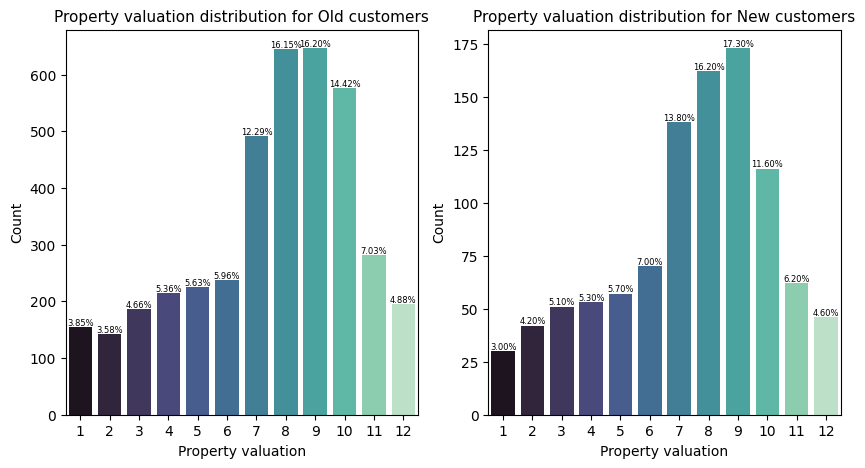

In [159]:
custom_palette = sns.color_palette('mako', n_colors=12)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.countplot(x="property_valuation", data=Customerlist, palette=custom_palette, orient='v', ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_old) * 100),
            ha="center",
            fontsize=6)

axs[0].set_title('Property valuation distribution for Old customers', fontsize=11)
axs[0].set_xlabel('Property valuation')
axs[0].set_ylabel('Count')


# Plot the second subplot
sns.countplot(x="property_valuation", data=newcustomer_df, palette=custom_palette, orient='v', ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.2f}%'.format((height / total_new) * 100),
            ha="center",
            fontsize=6)

axs[1].set_title('Property valuation distribution for New customers', fontsize=11)
axs[1].set_xlabel('Property valuation')
axs[1].set_ylabel('Count')

plt.show()

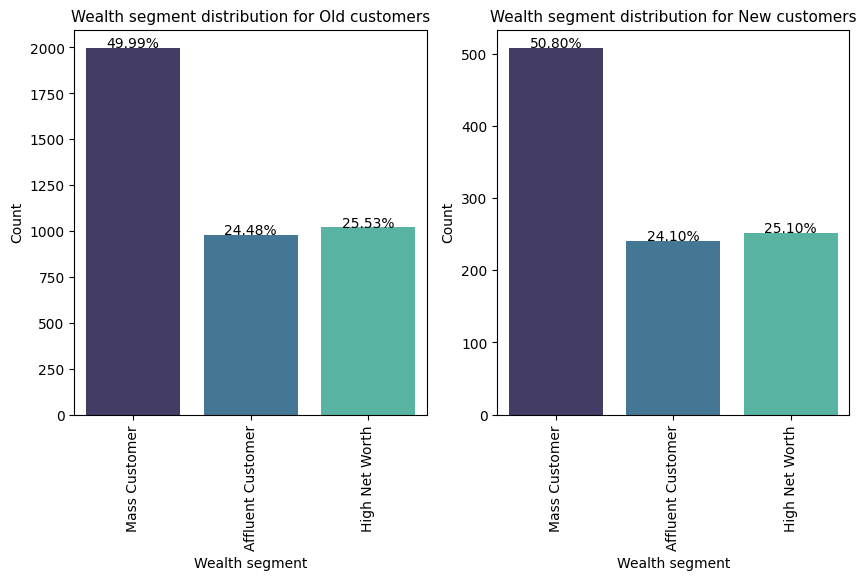

In [160]:
custom_palette = sns.color_palette('mako', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.countplot(x="wealth_segment", data=Customerlist, palette=custom_palette, orient='v', ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_old) * 100),
            ha="center")

axs[0].set_title('Wealth segment distribution for Old customers', fontsize=11)
axs[0].set_xlabel('Wealth segment')
axs[0].set_ylabel('Count')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)


# Plot the second subplot
sns.countplot(x="wealth_segment", data=newcustomer_df, palette=custom_palette, orient='v', ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.2f}%'.format((height / total_new) * 100),
            ha="center")

axs[1].set_title('Wealth segment distribution for New customers', fontsize=11)
axs[1].set_xlabel('Wealth segment')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)

plt.show()

In [161]:
frequency = Customerlist.groupby(['wealth_segment'])['frequency'].sum().tolist()
monetory = Customerlist.groupby(['wealth_segment'])['Monetary'].sum().tolist()
recency = Customerlist.groupby(['wealth_segment'])['recency'].mean().tolist()

wealth_transaction = pd.DataFrame({'wealth_segment': sorted(Customerlist['wealth_segment'].value_counts().index.tolist()),
                         'frequency': frequency,
                         'monetary': monetory,
                         'recency': recency,
                        })

wealth_transaction

,wealth_segment,frequency,monetary,recency
0,Affluent Customer,4849,2695019.03,63.738596
1,High Net Worth,5081,2785238.99,60.386992
2,Mass Customer,10029,5540332.13,61.566485


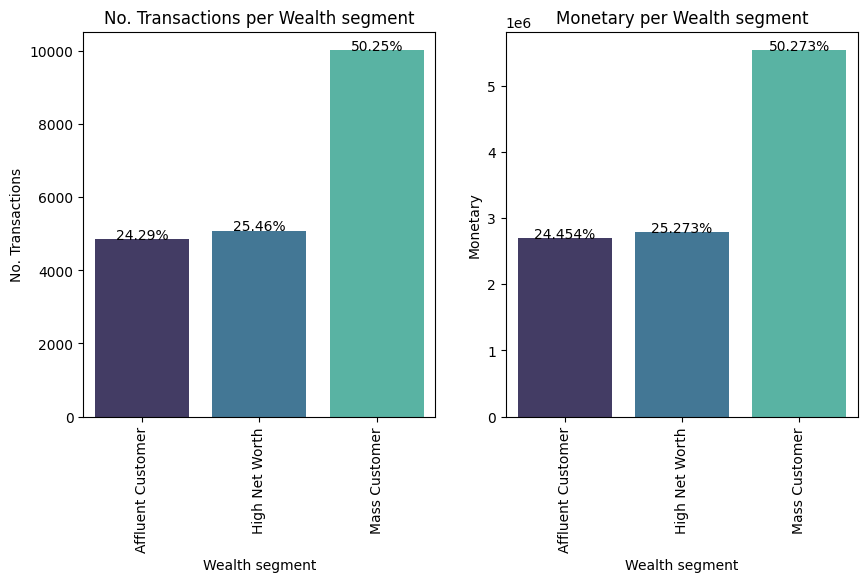

In [162]:
custom_palette = sns.color_palette('mako', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.barplot(data=wealth_transaction , x='wealth_segment', y='frequency', palette=custom_palette, ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / wealth_transaction['frequency'].sum()) * 100),
            ha="center")
axs[0].set_title("No. Transactions per Wealth segment")
axs[0].set_xlabel('Wealth segment')
axs[0].set_ylabel('No. Transactions')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)

# Plot the second subplot
sns.barplot(data=wealth_transaction , x='wealth_segment', y='monetary', palette=custom_palette, ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.3f}%'.format((height*100) / wealth_transaction['monetary'].sum()),
            ha="center")
axs[1].set_title('Monetary per Wealth segment')
axs[1].set_xlabel('Wealth segment')
axs[1].set_ylabel('Monetary')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)

plt.show()

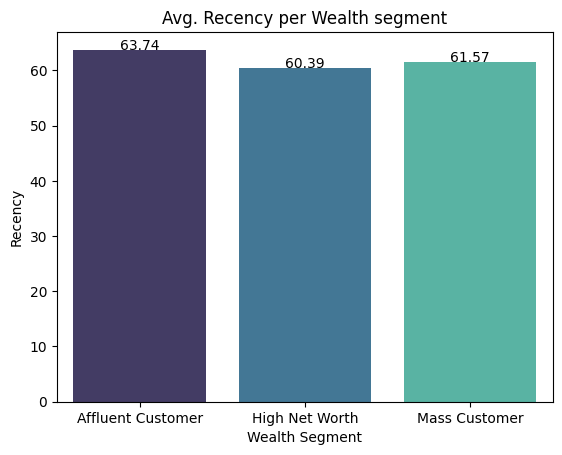

In [163]:
custom_palette = sns.color_palette('mako', n_colors=3)
ax = sns.barplot(data=wealth_transaction, x='wealth_segment', y='recency', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}'.format(height),
            ha="center")

ax.set_xlabel('Wealth Segment')
ax.set_ylabel('Recency')
ax.set_title("Avg. Recency per Wealth segment")
plt.show()

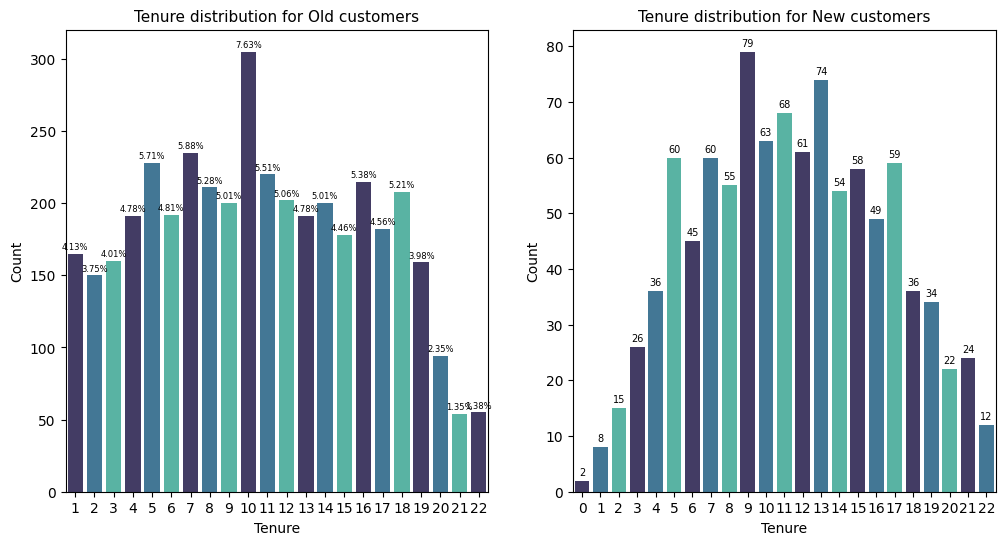

In [164]:
custom_palette = sns.color_palette('mako', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# Plot the first subplot
sns.countplot(x="tenure", data=Customerlist, palette=custom_palette, orient='v', ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_old) * 100),
            ha="center",
            fontsize=6)

axs[0].set_title('Tenure distribution for Old customers', fontsize=11)
axs[0].set_xlabel('Tenure')
axs[0].set_ylabel('Count')


# Plot the second subplot
sns.countplot(x="tenure", data=newcustomer_df, palette=custom_palette, orient='v', ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.0f}'.format(height),
            ha="center",
            fontsize=7)

axs[1].set_title('Tenure distribution for New customers', fontsize=11)
axs[1].set_xlabel('Tenure')
axs[1].set_ylabel('Count')

plt.show()

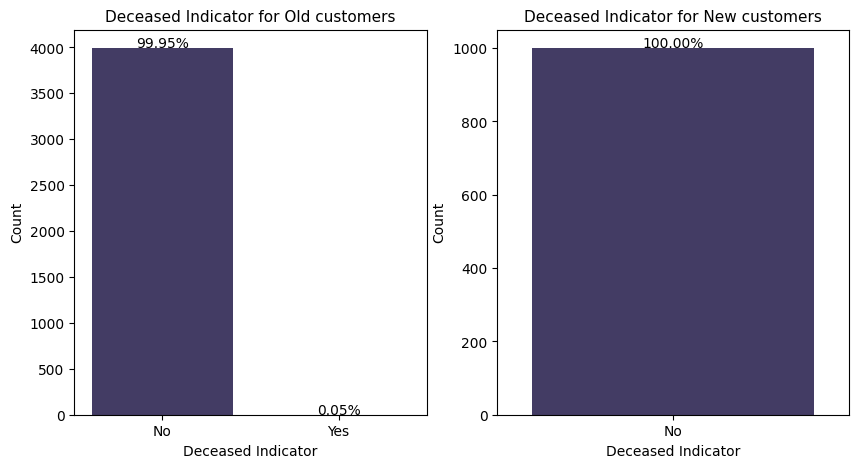

In [165]:
custom_palette = sns.color_palette('mako', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.countplot(x="deceased_indicator", data=Customerlist, palette=custom_palette, orient='v', ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_old) * 100),
            ha="center")

axs[0].set_title('Deceased Indicator for Old customers', fontsize=11)
axs[0].set_xlabel('Deceased Indicator')
axs[0].set_ylabel('Count')


# Plot the second subplot
sns.countplot(x="deceased_indicator", data=newcustomer_df, palette=custom_palette, orient='v', ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.2f}%'.format((height / total_new) * 100),
            ha="center")

axs[1].set_title('Deceased Indicator for New customers', fontsize=11)
axs[1].set_xlabel('Deceased Indicator')
axs[1].set_ylabel('Count')

plt.show()

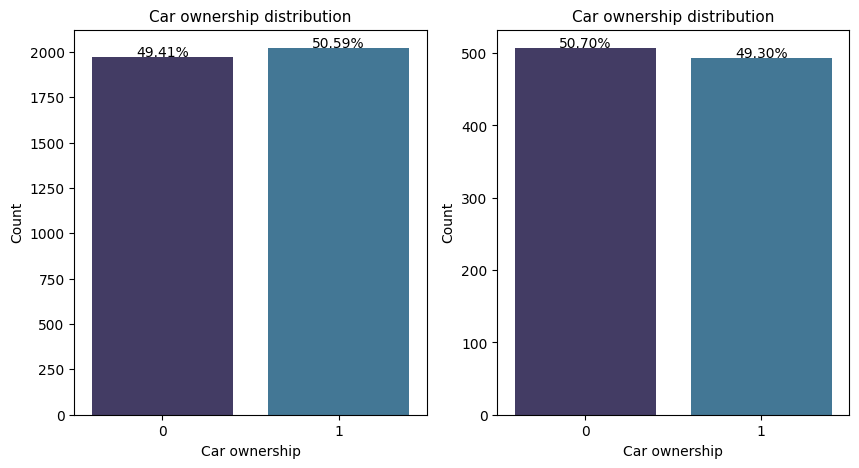

In [166]:
custom_palette = sns.color_palette('mako', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.countplot(x="owns_car", data=Customerlist, palette=custom_palette, orient='v', ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total_old) * 100),
            ha="center")

axs[0].set_title('Car ownership distribution', fontsize=11)
axs[0].set_xlabel('Car ownership')
axs[0].set_ylabel('Count')


# Plot the second subplot
sns.countplot(x="owns_car", data=newcustomer_df, palette=custom_palette, orient='v', ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height + 1,
            '{:.2f}%'.format((height / total_new) * 100),
            ha="center")

axs[1].set_title('Car ownership distribution', fontsize=11)
axs[1].set_xlabel('Car ownership')
axs[1].set_ylabel('Count')

plt.show()

In [167]:
frequency = Customerlist.groupby(['owns_car'])['frequency'].sum().tolist()
monetory = Customerlist.groupby(['owns_car'])['Monetary'].sum().tolist()
recency = Customerlist.groupby(['owns_car'])['recency'].mean().tolist()

cars_nt = pd.DataFrame({'owns_car': sorted(Customerlist['owns_car'].value_counts().index.tolist()),
                         'frequency': frequency,
                         'monetary': monetory,
                         'recency': recency,
                        })

cars_nt

,owns_car,frequency,monetary,recency
0,0,9917,5403273.44,62.867918
1,1,10042,5617316.71,60.751152


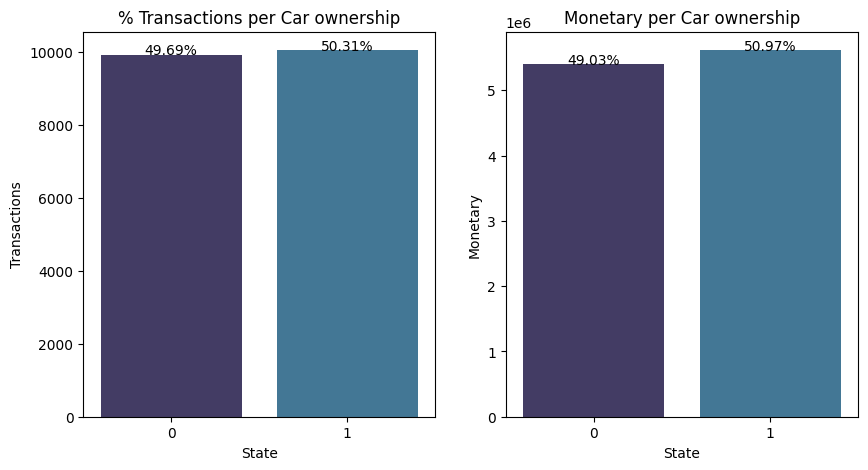

In [168]:
custom_palette = sns.color_palette('mako', n_colors=3)
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the first subplot
sns.barplot(data=cars_nt, x='owns_car', y='frequency', palette=custom_palette, ax=axs[0])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / cars_nt['frequency'].sum()) * 100),
            ha="center")
axs[0].set_title("% Transactions per Car ownership")
axs[0].set_xlabel('State')
axs[0].set_ylabel('Transactions')


# Plot the second subplot
sns.barplot(data=cars_nt, x='owns_car', y='monetary', palette=custom_palette, ax=axs[1])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}%'.format((height / cars_nt['monetary'].sum()) * 100),
            ha="center")
axs[1].set_title('Monetary per Car ownership')
axs[1].set_xlabel('State')
axs[1].set_ylabel('Monetary')

plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

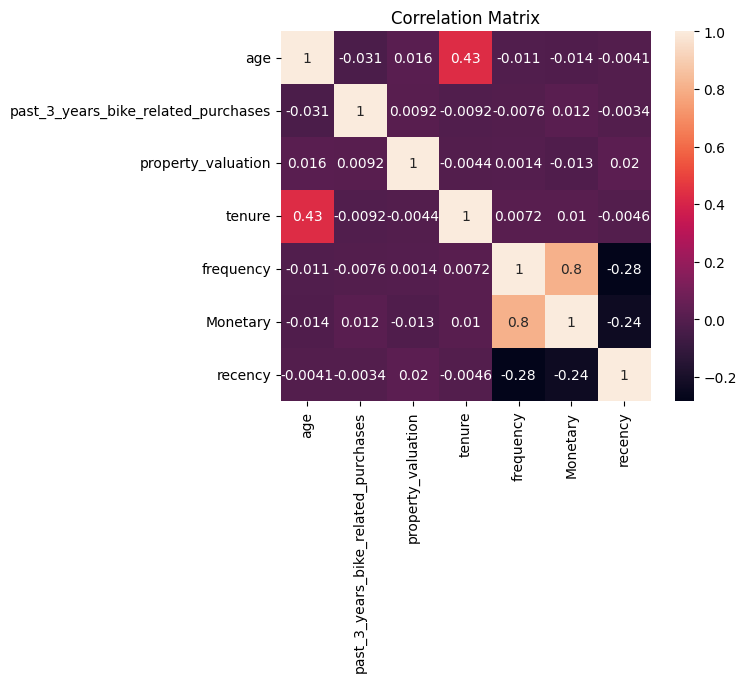

In [169]:
df_subset = Customerlist[['age', 'past_3_years_bike_related_purchases', 'property_valuation', 'tenure', 'frequency', 'Monetary',  'recency']]
mat = df_subset.corr()
sns.heatmap(mat, square=True, annot = True)
plt.title('Correlation Matrix')